In [1]:
from fastai import *
from fastai.vision import *
import torch.onnx
from torch.autograd import Variable
import os
from torch.optim import *

os.environ["TORCH_HOME"] = "/media/subhaditya/DATA/COSMO/Datasets-Useful"

In [2]:
path = untar_data(URLs.CIFAR)

In [3]:
data = (
    (
        ImageList.from_folder(path)
        .split_by_rand_pct()
        .label_from_folder()
        .transform(get_transforms(), size=64)
    )
    .databunch(bs=64)
    .normalize(imagenet_stats)
)

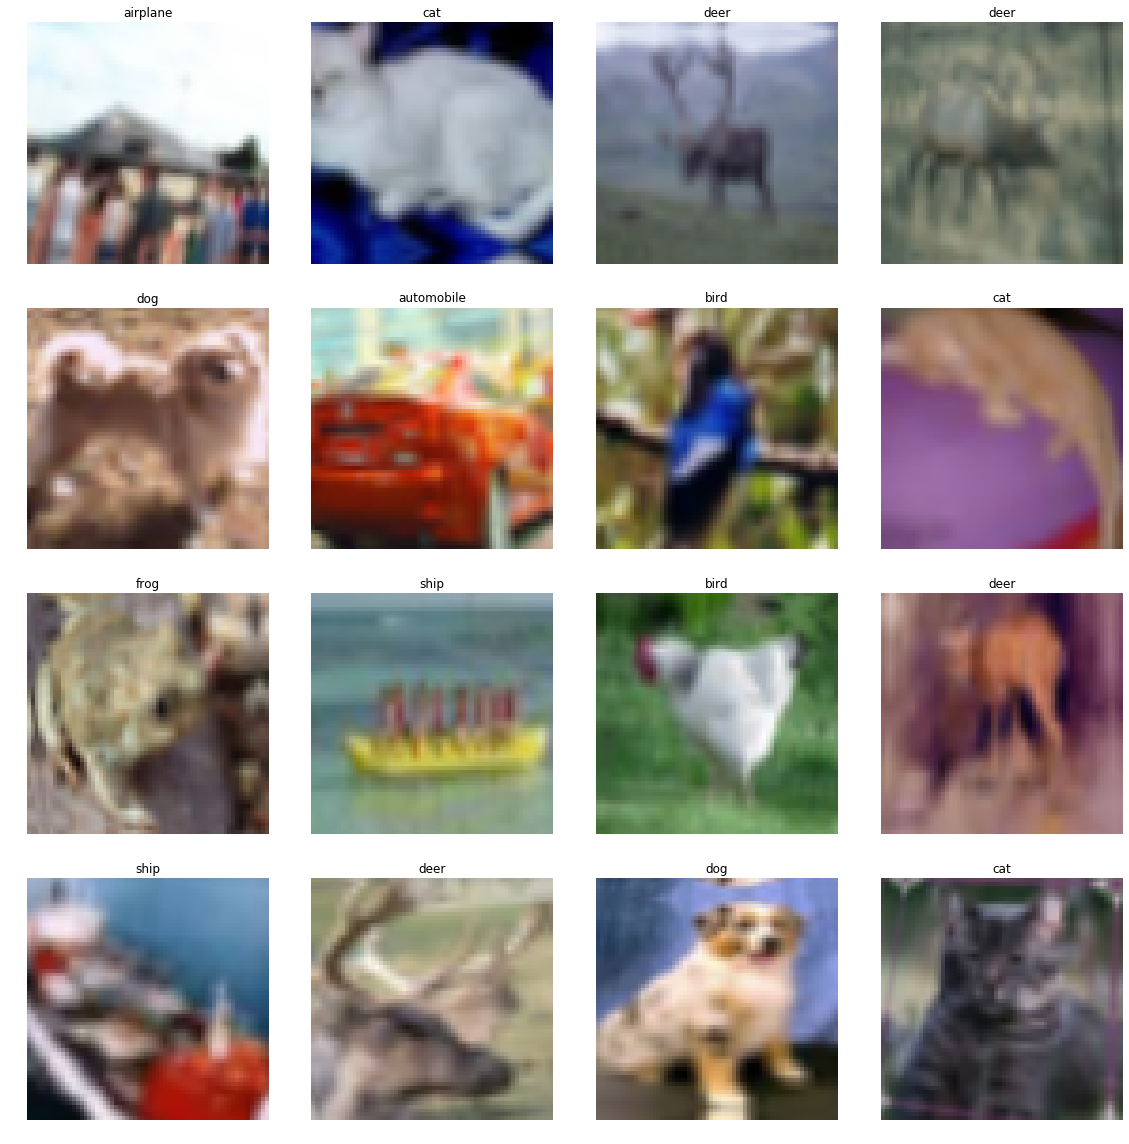

In [4]:
data.show_batch(4)

In [5]:
data.c

10

# Resnet34

# Selu

In [6]:
model = models.resnet34()

In [16]:
class swish(nn.Module):
    def __init__(self):
        super(swish, self).__init__()
    def forward(self, x):
        return x*torch.sigmoid(x)

In [17]:
def conv_to_swish(block):
    
    for x in block:
        x.relu = swish()
    return block

In [18]:
model.layer1[0].relu

swish()

In [19]:
model.layer1 = conv_to_swish(model.layer1)
model.layer2 = conv_to_swish(model.layer2)
model.layer3 = conv_to_swish(model.layer3)
model.layer4 = conv_to_swish(model.layer4)

In [20]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): swish()
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): swish()
      (conv2): Conv2d(64

In [21]:
learn = None
gc.collect()

7749

In [22]:
learn = Learner(
    data, model, metrics=[accuracy], opt_func=AdamW, callback_fns=ShowGraph
).to_fp16()

epoch,train_loss,valid_loss,accuracy,time


/home/subhaditya/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


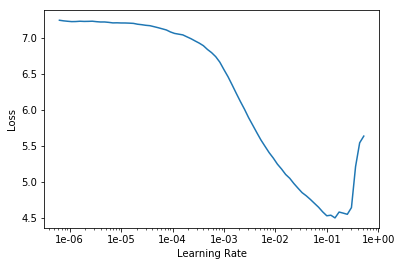

In [15]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,1.267259,1.292284,0.554917,00:39
1,1.083450,1.135167,0.611417,00:40
2,0.949628,0.863346,0.697333,00:40
3,0.812972,0.890975,0.691583,00:41
4,0.753337,0.654677,0.771333,00:41
5,0.673993,0.659083,0.770917,00:47
6,0.615795,0.633196,0.785833,00:44
7,0.567721,0.561487,0.807250,00:45
8,0.513622,0.545156,0.811417,00:43
9,0.448476,0.500337,0.828167,00:41


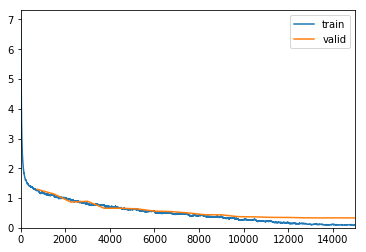

In [23]:
learn.unfreeze()
learn.fit_one_cycle(20, slice(5e-3), wd=1e-3)

# Same thing with relu

In [24]:
learn = None

In [25]:
learn = Learner(
    data, models.resnet34(), metrics=[accuracy], opt_func=AdamW, callback_fns=ShowGraph
).to_fp16()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


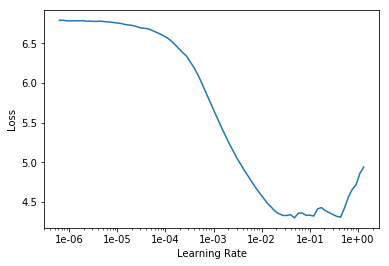

In [26]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,1.311188,1.342498,0.523333,00:41
1,1.127244,1.238078,0.583667,00:42
2,0.989998,1.003727,0.657250,00:41
3,0.927889,0.868462,0.701333,00:41
4,0.801675,0.854299,0.715250,00:42
5,0.722286,0.763160,0.745167,00:41
6,0.628567,0.664241,0.775917,00:41
7,0.603195,0.613085,0.789167,00:42
8,0.535522,0.548125,0.814167,00:42
9,0.487136,0.559843,0.806583,00:41


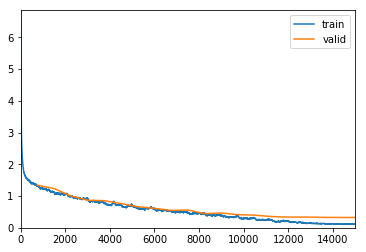

In [27]:
learn.unfreeze()
learn.fit_one_cycle(20, slice(4e-3), wd=1e-3)

# CONCLUSION -> Honestly I dont see much difference 